Gradient Boosting 

Environment für dieses Notebook: `ads-ml-full` (*requirements-py3.11-ads-ml-full.txt*).


## Daten einlesen

In [1]:
from pathlib import Path

URL = (
    "https://data.milwaukee.gov/dataset/7a8b81f6-d750-4f62-aee8-30ffce1c64ce/resource/f083631f-e34e-4ad6-aba1-d6d7dd265170/download/2002-2018-property-sales-data.csv"
)
data = Path("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv")

In [2]:
import pandas as pd

data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv") 
data.head(10)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
5,79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0
6,80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0
7,81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0
8,82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0
9,83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0


## Trainings- und Testdaten

In [5]:
unlabeled = data[data["Immobilien_Alter"].isna()].copy()
len(unlabeled)

0

In [6]:
labeled = data[data["Immobilien_Alter"].notna()]
len(labeled)

9192

In [ ]:
unlabeled = data[data["Year_Built"].isna()].copy()
len(unlabeled)

In [ ]:
labeled = data[data["Year_Built"].notna()]
len(labeled)

In [ ]:
unlabeled = data[data["Lotsize"].isna()].copy()
len(unlabeled)

In [ ]:
labeled = data[data["Lotsize"].notna()]##
len(labeled)

In [ ]:
unlabeled = data[data["Fbath"].isna()].copy()
len(unlabeled)

In [ ]:
labeled = data[data["Fbath"].notna()]##
len(labeled)

In [ ]:
unlabeled = data[data["Style"].isna()].copy()
len(unlabeled)

In [ ]:
labeled = data[data["Style"].notna()] ##
len(labeled) 

In [ ]:
unlabeled = data[data["District"].isna()].copy()
len(unlabeled)

In [ ]:
labeled = data[data["District"].notna()] ##
len(labeled) 

In [ ]:
unlabeled = data[data["Premium"].isna()].copy()
len(unlabeled)

In [ ]:
labeled = data[data["Premium"].notna()] ##
len(labeled) 

In [ ]:
unlabeled = data[data["PropType"].isna()].copy()
len(unlabeled)

In [ ]:
labeled = data[data["PropType"].notna()] ##
len(labeled) 

In [49]:
from sklearn.model_selection import train_test_split

y = "Sale_price"
X = labeled.columns.to_list()
X.remove(y)
train_data, test_data = train_test_split(labeled, test_size=0.2, random_state=42)

In [50]:
data.head(10)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
5,79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0
6,80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0
7,81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0
8,82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0
9,83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0


### Alle (möglichen) Features

In [75]:
num_cols_4 = [
    "Fbath",
    "Lotsize",
    "Fin_sqft",
    "Immobilien_Alter", #"Sale_date",  "Fläche_pro_Bad",
]

cat_cols_4 = [
    "PropType",
    "District",
    "Style",
    "Premium", #"Year_Built",
]
cols_set_4 = [*num_cols_4, *cat_cols_4]

num_cols_4_ix = [cols_set_4.index(col) for col in num_cols_4]
cat_cols_4_ix = [cols_set_4.index(col) for col in cat_cols_4]

In [76]:
cat_cols_4_ix

[4, 5, 6, 7]

### Versuch 4: Gradient Boosting + mehr kategorische Features

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ct_4a = ColumnTransformer(
    transformers=[
        ("imp", IterativeImputer(random_state=42), num_cols_4_ix),
    ],
    remainder="passthrough",
)

In [78]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ct_4b = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), num_cols_4_ix),
        (
            "ohe",
            OneHotEncoder(handle_unknown="ignore", sparse_output=True),
            cat_cols_4_ix,
        ),
    ],
)

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

est_4 = GradientBoostingRegressor(
    subsample=0.9,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
)

In [80]:
from sklearn.pipeline import Pipeline

pipeline_4 = Pipeline(steps=[("prep_a", ct_4a), ("prep_b", ct_4b), ("model", est_4)])

In [81]:
pipeline_4

Pipeline(steps=[('prep_a',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp',
                                                  IterativeImputer(random_state=42),
                                                  [0, 1, 2, 3])])),
                ('prep_b',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  [0, 1, 2, 3]),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [4, 5, 6, 7])])),
                ('model',
                 GradientBoostingRegressor(max_depth=4, min_samples_leaf=5,
                                           min_samples_split=10,
                                           random_state=42, subsample=0.9))])

In [82]:
%%time
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=pipeline_4, X=train_data[cols_set_4], y=train_data[y], cv=5, n_jobs=3)

CPU times: user 44.4 ms, sys: 36.4 ms, total: 80.7 ms
Wall time: 3.39 s


array([0.66377469, 0.57614969, 0.66235358, 0.65620151, 0.66379466])

In [83]:
import os
from dotenv import load_dotenv
import mlflow

load_dotenv()

mlflow.set_tracking_uri(os.getenv("LOCAL_MLFLOW_TRACKING_URI"))  # "sqlite:///mlflow.db"
mlflow.set_experiment("4E-e2e-part4")
mlflow.sklearn.autolog(log_models=False, log_datasets=False, silent=True)

In [84]:
%%time
pipeline_4.fit(X=train_data[cols_set_4], y=train_data[y])

CPU times: user 1.29 s, sys: 315 ms, total: 1.6 s
Wall time: 1.28 s


Pipeline(steps=[('prep_a',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp',
                                                  IterativeImputer(random_state=42),
                                                  [0, 1, 2, 3])])),
                ('prep_b',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  [0, 1, 2, 3]),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [4, 5, 6, 7])])),
                ('model',
                 GradientBoostingRegressor(max_depth=4, min_samples_leaf=5,
                                           min_samples_split=10,
                                           random_state=42, subsample=0.9))])

In [85]:
pipeline_4.score(X=test_data[cols_set_4], y=test_data[y])

0.6659602196168033

#### Fluch der Dimensionalität

In [86]:
pipeline_4[:-1].transform(X=test_data[cols_set_4])

<1839x50 sparse matrix of type '<class 'numpy.float64'>'
	with 14710 stored elements in Compressed Sparse Row format>

Einige der Features sind hochkardinal, das führt zu einer unglaublich großen Feature Matrix. Der GradientBoostingRegressor kann out-of-the-box noch damit rechnen, weitere Verarbeitung, die eine Matrix nicht im SciPy Sparse Matrix Format erfordern würde, sind aber deutlich erschwert!

## XAI

In [87]:
transformed_test_4 = pipeline_4[:-1].transform(test_data[cols_set_4]).toarray()

In [88]:
transformed_test_4

array([[-0.62462503,  4.17677251, -0.25451027, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.0370493 ,  0.04957811, -0.67037187, ...,  0.        ,
         1.        ,  0.        ],
       [-0.62462503, -0.3489707 , -0.78618143, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.0370493 , -0.12755469,  2.53895667, ...,  0.        ,
         1.        ,  0.        ],
       [-0.62462503, -0.51724687, -1.36347454, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.0370493 , -0.81246821,  0.35436726, ...,  0.        ,
         1.        ,  0.        ]])

In [89]:
import shap

explainer_4 = shap.TreeExplainer(pipeline_4.named_steps["model"])
shap_values = explainer_4.shap_values(transformed_test_4)

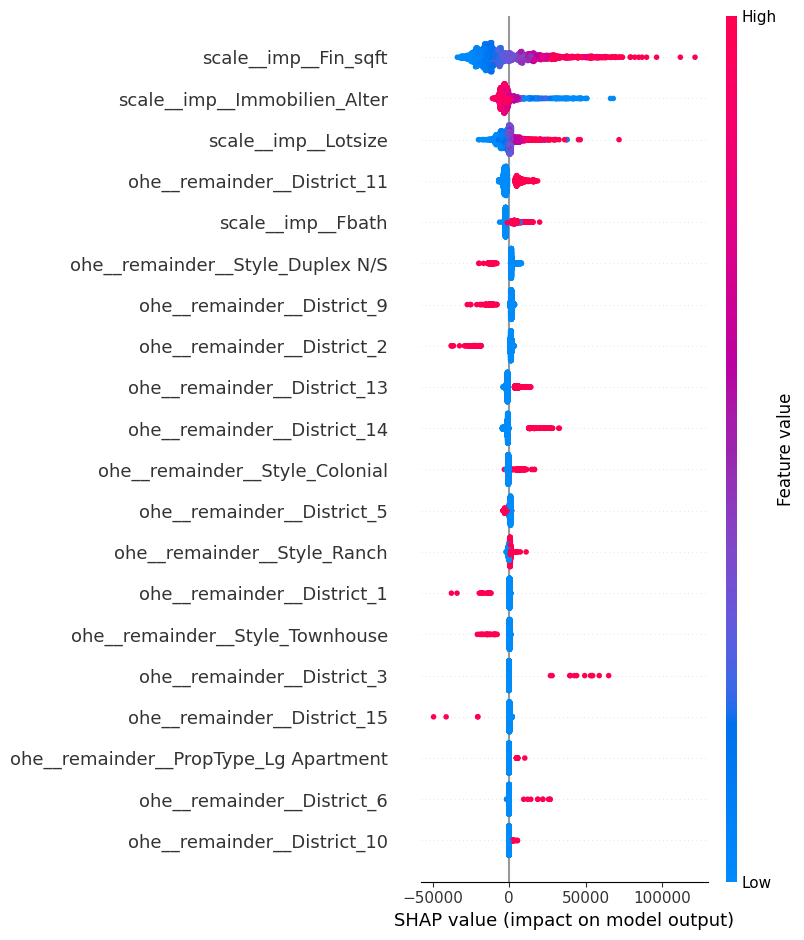

In [90]:
shap.summary_plot(
    shap_values=shap_values,
    features=transformed_test_4,
    feature_names=pipeline_4[:-1].get_feature_names_out(),
)

In [91]:
import shap

In [92]:
explainer_4 = shap.TreeExplainer(model=est_4)
shap_values_test_4 = explainer_4.shap_values(X=transformed_test_4)

In [93]:
explanation_4 = explainer_4(X=transformed_test_4)

In [94]:
explainer_4.expected_value

array([152180.33448095])

In [95]:
train_data["Sale_price"].mean()

152183.65837073303

In [96]:
shap.summary_plot(
    shap_values=shap_values_test_4,
    features=transformed_test_4,
    feature_names=transformed_test_4.columns,
)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'